<a href="https://colab.research.google.com/github/Angelgz011/estadistica2/blob/main/Proyecto_u3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

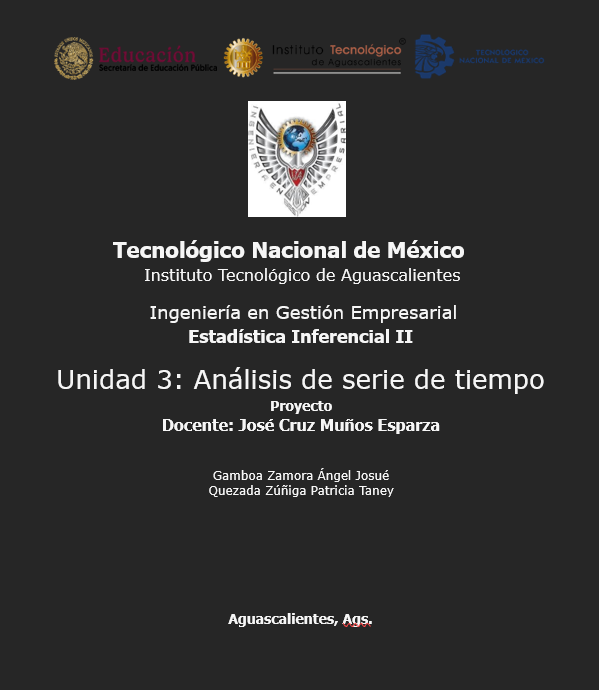



# Introducción

En los analisis de series de tiempo financiero se pueden identificar patrones, tendencias y relaciones entre los precios de activos. En este proyecto analizaremos los precios de cierre de COSTCO Wholesale y Procter & Gamble PG entre enero de 2024 y enero de 2025. Se aplican tecnicas de descomposición estacional, modelos de tendencia polinomial, pruebas de estacionariedad  y causalidad de granger, además de modelos de predicción de Prophet para evaluar si eciste relación causal entre ambas series y predecir sus comportamientos.

# Marco Teórico
 Series de Tiempo Financieras
Las series de tiempo financieras representan la evolución temporal de variables económicas o bursátiles, como los precios de acciones, tipos de cambio o tasas de interés. Estas series se caracterizan frecuentemente por comportamientos no estacionarios, alta volatilidad y presencia de tendencias o estacionalidades. La no estacionariedad implica que las propiedades estadísticas como la media y la varianza cambian con el tiempo, lo que complica el análisis predictivo directo.

2. Estacionariedad y Pruebas Estadísticas
Antes de aplicar modelos de predicción o relaciones entre variables, es necesario determinar si las series son estacionarias. Las pruebas más comunes para este fin son:

ADF (Dickey-Fuller Aumentada): Contrasta la hipótesis de presencia de raíz unitaria (no estacionariedad).

KPSS (Kwiatkowski-Phillips-Schmidt-Shin): Contrasta la hipótesis de estacionariedad en la serie.

Una serie no estacionaria puede transformarse mediante diferenciación o eliminación de tendencias, por ejemplo, ajustando modelos polinómicos y analizando los residuales.

3. Tendencias y Modelos Polinómicos
Una tendencia es el patrón de crecimiento o decrecimiento a lo largo del tiempo. El ajuste de una tendencia polinómica permite modelar relaciones no lineales entre el tiempo y la variable de interés. Posteriormente, los residuales (diferencia entre valores reales y estimados) pueden analizarse para verificar si la componente estocástica es estacionaria, lo cual es clave para una correcta interpretación del modelo.

4. Causalidad de Granger
La prueba de causalidad en el sentido de Granger es una herramienta estadística que permite determinar si una serie temporal X ayuda a predecir una serie Y. Esta prueba no implica causalidad directa, sino una relación predictiva: si los valores pasados de X contienen información útil sobre los futuros valores de Y.

La prueba se basa en comparar la calidad de predicción de un modelo autorregresivo simple de Y contra uno que incluye rezagos de X. Si los valores de X mejoran significativamente la predicción de Y, se rechaza la hipótesis nula de no causalidad.

5. Modelos de Predicción: Prophet
Prophet es un modelo desarrollado por Facebook que facilita la generación de pronósticos a partir de series temporales con componentes aditivos. Integra automáticamente tendencias, estacionalidades y festivos, y está diseñado para ser robusto ante valores atípicos y cambios abruptos. Es especialmente útil cuando se cuenta con datos históricos en intervalos regulares y permite una visualización clara de las proyecciones futuras.



# Hipotesis
El presente estudio busca evaluar la existencia de una relación de causalidad en el sentido de Granger entre los precios de cierre de las acciones de Procter & Gamble (PG) y COSTCO Wholesale (COST). Para ello se plantean las siguientes hipótesis:

Hipótesis nula (H₀): Los precios de cierre de una acción no causan en el sentido de Granger a los precios de cierre de la otra. Es decir:

H₀₁: COSTCO no causa a Procter & Gamble.

H₀₂: Procter & Gamble no causa a COSTCO.

Hipótesis alternativa (H₁): Los precios de cierre de una acción sí causan en el sentido de Granger a los precios de cierre de la otra. Es decir:

H₁₁: COSTCO causa a Procter & Gamble.

H₁₂: Procter & Gamble causa a COSTCO.

Estas hipótesis serán contrastadas mediante la prueba de causalidad de Granger, evaluando distintos rezagos y considerando un nivel de significancia del 5%.



# Metodología
Obtención de datos:
Se descargaron los datos históricos de acciones de COSTCO y PG mediante las APIs de yfinance y alpha_vantage, abarcando del 1 de enero de 2024 al 1 de abril de 2025.

Análisis exploratorio:

Se graficaron los precios de cierre.

Se aplicaron promedios móviles (SMA y suavización exponencial) para observar tendencias.

Pruebas de estacionariedad:

Se aplicaron las pruebas ADF y KPSS para verificar la estacionariedad de las series y de sus residuales tras ajustes polinómicos.

Modelado de tendencia:

Se usaron modelos polinomiales de grado 2 para identificar tendencias no lineales y analizar residuales.

Causalidad de Granger:

Se utilizó grangercausalitytests con hasta 5 rezagos para determinar si una serie puede predecir a otra.

Pronóstico:

Se implementó el modelo Prophet para generar predicciones futuras de los precios de cierre de ambas acciones.

In [26]:
#1.Seleccionar una marca y obtener los datos:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='COST',            # tickers: COSTCO: 	Costco Whalesale
    start='2024-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,COST_Open,COST_High,COST_Low,COST_Close,COST_Adj Close,COST_Volume
Date,,,,,,
2024-01-02,655.580017,657.799988,649.500000,650.650024,645.317383,2657700
2024-01-03,651.210022,655.450012,643.099976,644.690002,639.406250,2612600
2024-01-04,642.080017,649.900024,640.510010,648.349976,643.036194,2171100
2024-01-05,656.179993,659.650024,652.239990,656.010010,650.633484,2232100
2024-01-08,655.809998,662.080017,654.030029,661.690002,656.266968,2245300
...,...,...,...,...,...,...
2025-03-25,926.630005,932.289978,922.489990,930.260010,929.049500,1623000
2025-03-26,934.330017,939.419983,923.450012,929.750000,928.540161,1644700
2025-03-27,929.559998,942.900024,928.000000,938.750000,937.528442,1547000


In [27]:
pip install alpha_vantage

In [28]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'R5DJHU4WS6QM5QH9'   #Clave Angel
# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de MSFT
ticker = 'COST'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,COST_Open,COST_High,COST_Low,COST_Close,COST_Volume
date,,,,,
2025-04-01,942.42,957.7236,938.7500,954.40,2041507.0
2025-03-31,922.36,995.0000,922.0432,945.78,3101963.0
2025-03-28,937.50,938.7500,926.0000,929.66,2100487.0
2025-03-27,929.56,942.9037,928.0000,938.75,1546989.0
2025-03-26,934.33,939.4151,923.4500,929.75,1646854.0
...,...,...,...,...,...
2024-01-08,655.81,662.0800,654.0338,661.69,2245294.0
2024-01-05,656.18,659.6500,652.2400,656.01,2200193.0
2024-01-04,642.08,649.9000,640.5101,648.35,2171077.0


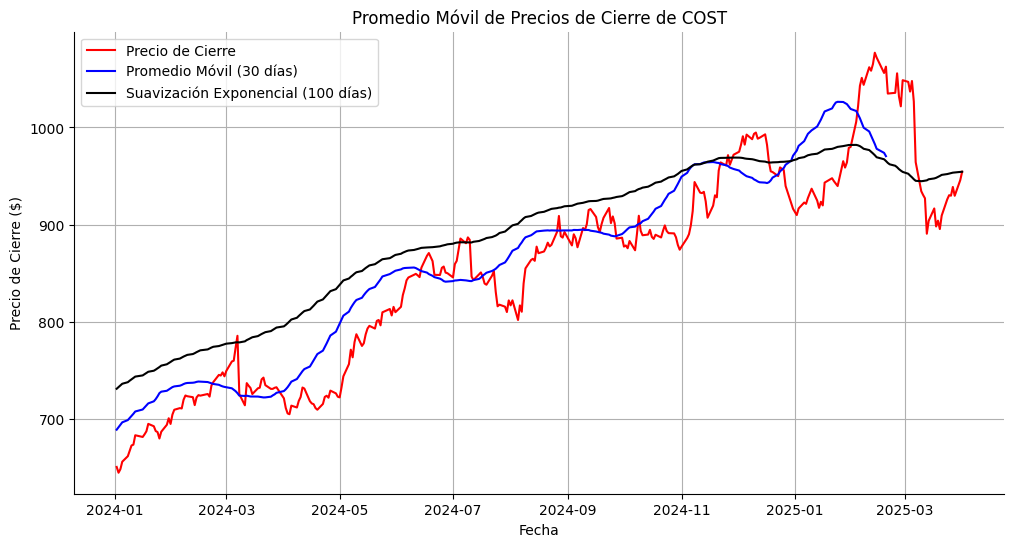

In [29]:
#Graficar la serie de tiempo:
# Promedio Móvil Simple
ventana_sma = 30
df['SMA'] = df['COST_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['COST_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['COST_Close'], label='Precio de Cierre', color='red')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='blue')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='black')
plt.title('Promedio Móvil de Precios de Cierre de COST')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La gráfica muestra una tendencia general al alza en el precio de las acciones de COST durante la mayor parte del período observado. Sin embargo, también se observa una caída pronunciada hacia el final. El promedio móvil de 30 días (azul) sigue de cerca las variaciones del precio de cierre, mientras que la suavización exponencial (negra) muestra una trayectoria más estable. La divergencia entre ambas al final sugiere un posible cambio de tendencia o una corrección importante en el mercado. Esto podría ser indicativo de un periodo de alta volatilidad o incertidumbre.

In [30]:
from statsmodels.tsa.stattools import adfuller, kpss

# Parte (b) - Pruebas de estacionariedad

# Serie de precios de cierre
serie = df['COST_Close']

# Prueba ADF
adf_result = adfuller(serie)
print('--- Prueba Dickey-Fuller Aumentada (ADF) ---')
print(f'Estadístico ADF: {adf_result[0]:.4f}')
print(f'Valor-p: {adf_result[1]:.4f}')
print(f'Número de rezagos: {adf_result[2]}')
print(f'Número de observaciones: {adf_result[3]}')
print('Valores críticos:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')
print('¿Rechazamos H0 (serie NO estacionaria)?', 'Sí' if adf_result[1] < 0.05 else 'No')

# Prueba KPSS

kpss_result = kpss(serie, regression='c', nlags='auto')
print('\n--- Prueba KPSS ---')
print(f'Estadístico KPSS: {kpss_result[0]:.4f}')
print(f'Valor-p: {kpss_result[1]:.4f}')
print(f'Número de rezagos: {kpss_result[2]}')
print('Valores críticos:')
for key, value in kpss_result[3].items():
    print(f'   {key}: {value:.4f}')
print('¿Rechazamos H0 (serie estacionaria)?', 'Sí' if kpss_result[1] < 0.05 else 'No')


--- Prueba Dickey-Fuller Aumentada (ADF) ---
Estadístico ADF: -0.4426
Valor-p: 0.9027
Número de rezagos: 3
Número de observaciones: 309
Valores críticos:
   1%: -3.4517
   5%: -2.8709
   10%: -2.5718
¿Rechazamos H0 (serie NO estacionaria)? No

--- Prueba KPSS ---
Estadístico KPSS: 2.4510
Valor-p: 0.0100
Número de rezagos: 11
Valores críticos:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
¿Rechazamos H0 (serie estacionaria)? Sí


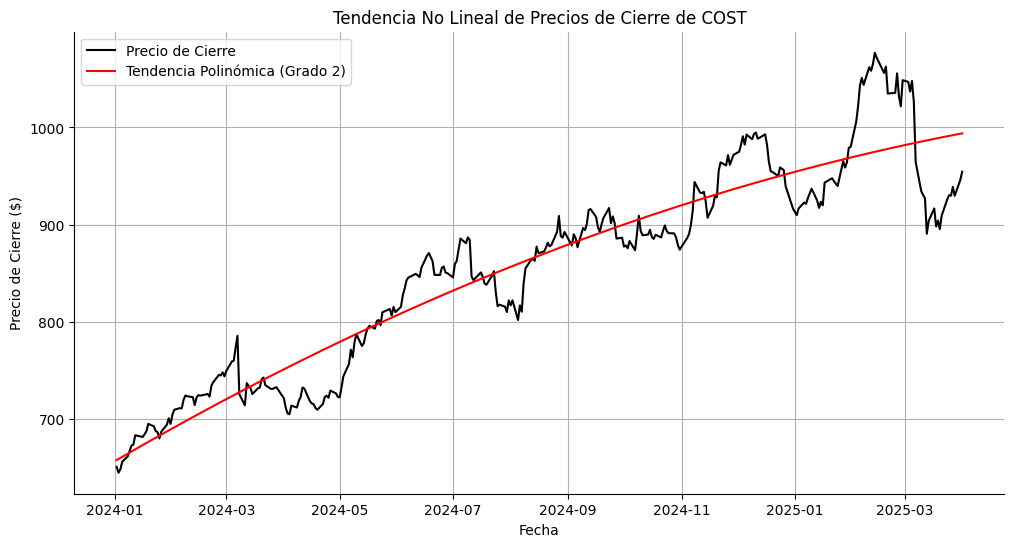

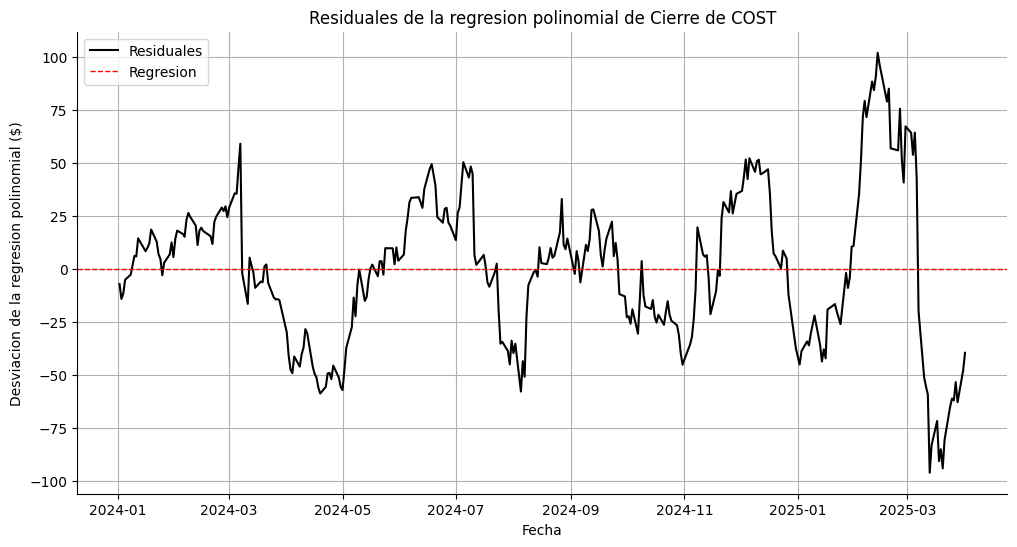

In [31]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['COST_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='black'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de COST') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de COST')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [32]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF (residuales):', adf_test[0])
print('p-value (residuales):', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF (residuales): -5.935315677093404
p-value (residuales): 2.328417240703774e-07
La tendencia es estacionaria (rechazamos la hipótesis nula).


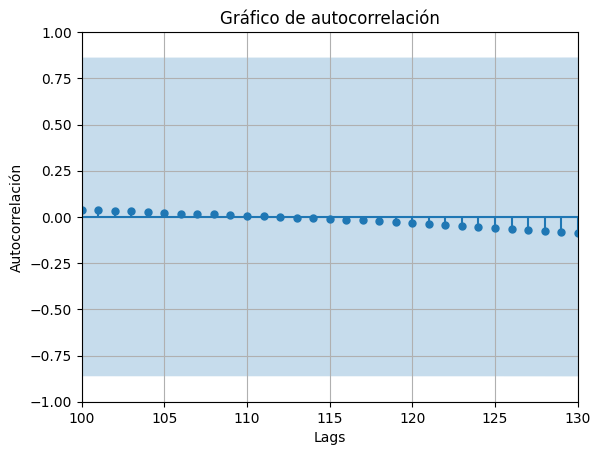

In [34]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['COST_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

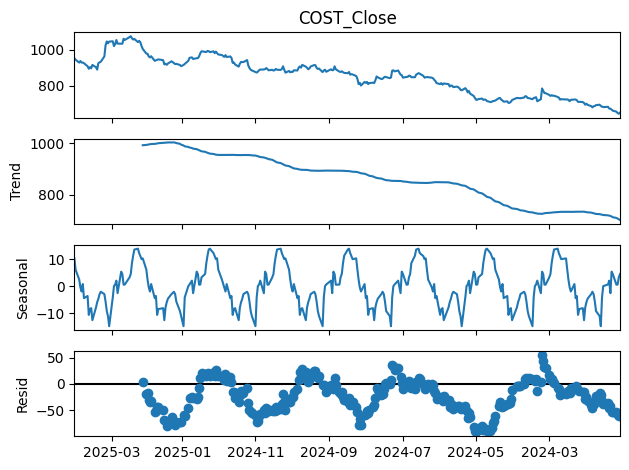

In [35]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['COST_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

In [36]:
#1.Seleccionar una marca y obtener los datos:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='PG',            # tickers: PG
    start='2024-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,PG_Open,PG_High,PG_Low,PG_Close,PG_Adj Close,PG_Volume
Date,,,,,,
2024-01-02,146.360001,149.410004,146.309998,148.740005,143.353867,7238400
2024-01-03,148.339996,149.199997,147.179993,147.839996,142.486420,7697500
2024-01-04,148.050003,149.270004,147.770004,148.649994,143.267090,7067400
2024-01-05,148.720001,148.869995,146.550003,147.419998,142.081650,5294200
2024-01-08,147.910004,148.919998,147.649994,148.690002,143.305664,8255300
...,...,...,...,...,...,...
2025-03-25,165.300003,165.369995,162.199997,162.850006,161.841202,8366700
2025-03-26,163.350006,166.820007,162.990005,166.580002,165.548080,7756000
2025-03-27,167.869995,169.029999,166.619995,168.710007,167.664902,6211700


In [37]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'R5DJHU4WS6QM5QH9'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de AAPL
ticker = 'PG'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,PG_Open,PG_High,PG_Low,PG_Close,PG_Volume
date,,,,,
2025-04-01,170.5700,171.0500,169.0600,170.56,7021507.0
2025-03-31,168.1015,171.1400,168.1015,170.42,11520451.0
2025-03-28,169.3800,169.7100,167.6200,168.03,5479306.0
2025-03-27,167.8700,169.0300,166.6200,168.71,6211735.0
2025-03-26,163.3500,166.8200,162.9900,166.58,7757259.0
...,...,...,...,...,...
2024-01-08,147.9100,148.9200,147.6500,148.69,8255307.0
2024-01-05,148.7200,148.8700,146.5500,147.42,5227247.0
2024-01-04,148.0500,149.2669,147.7700,148.65,7067618.0


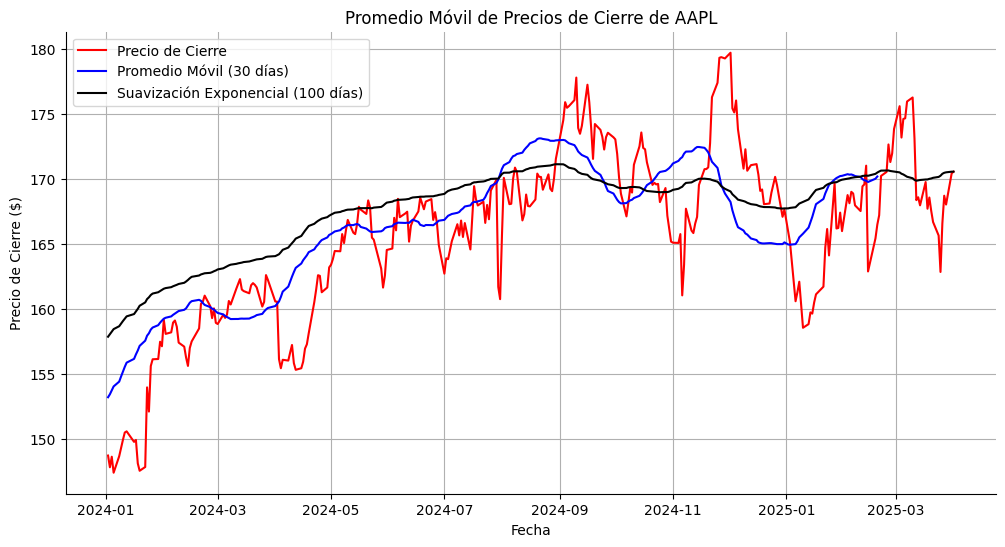

In [38]:
#Graficar la serie de tiempo:
# Promedio Móvil Simple
ventana_sma = 30
df['SMA'] = df['PG_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['PG_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['PG_Close'], label='Precio de Cierre', color='red')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='blue')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='black')
plt.title('Promedio Móvil de Precios de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

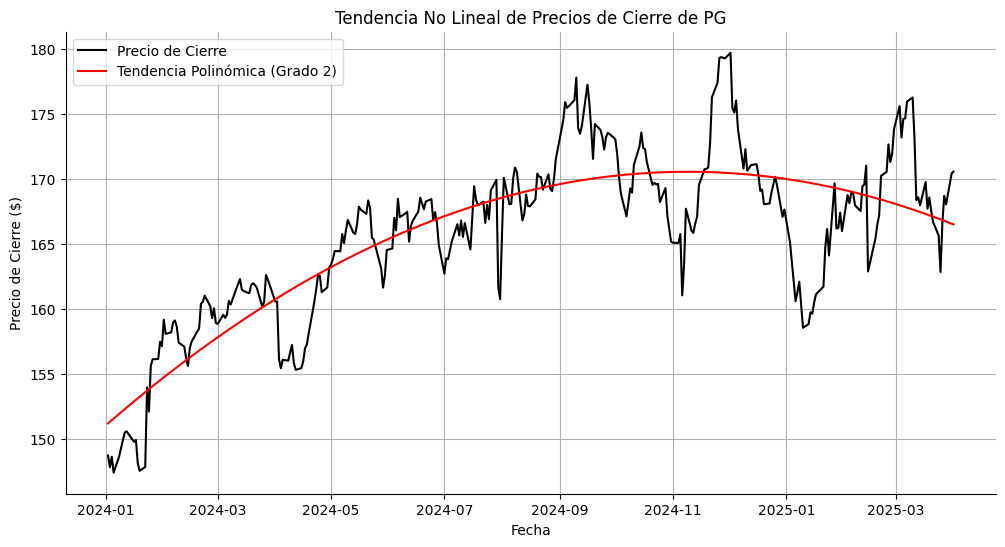

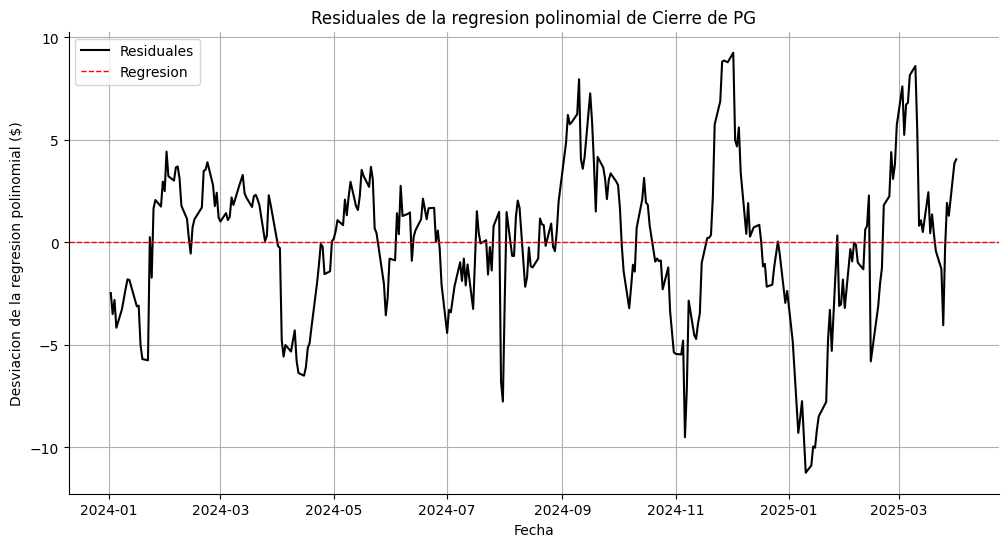

In [39]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['PG_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='black'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de PG') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de PG')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [40]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['PG_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.6591453106172922
p-value: 0.45227534861492374
La tendencia no es estacionaria (aceptamos la hipótesis nula).


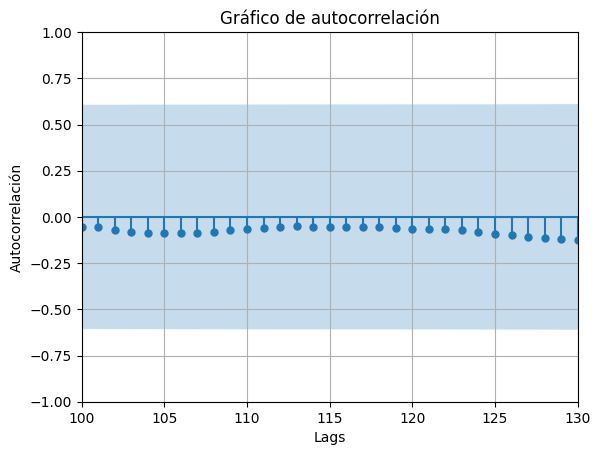

In [41]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['PG_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

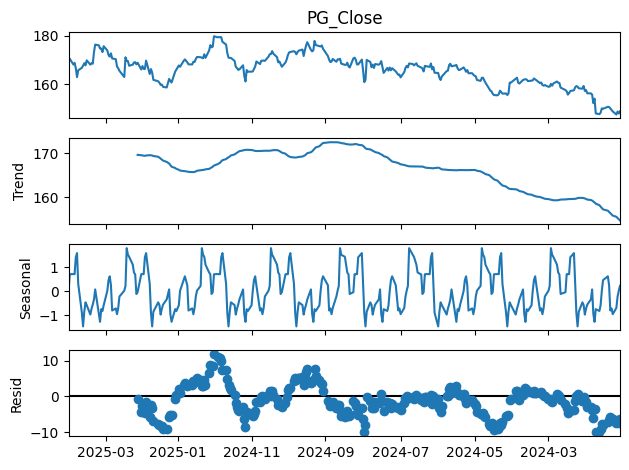

In [42]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['PG_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['PG', 'COST'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-01-01',        # Fecha de inicio
    end='2025-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df


[*********************100%***********************]  2 of 2 completed


,COST_Open,COST_High,COST_Low,COST_Close,COST_Adj Close,COST_Volume,PG_Open,PG_High,PG_Low,PG_Close,PG_Adj Close,PG_Volume
Date,,,,,,,,,,,,
2024-01-02,655.580017,657.799988,649.500000,650.650024,645.317383,2657700,146.360001,149.410004,146.309998,148.740005,143.353851,7238400
2024-01-03,651.210022,655.450012,643.099976,644.690002,639.406250,2612600,148.339996,149.199997,147.179993,147.839996,142.486435,7697500
2024-01-04,642.080017,649.900024,640.510010,648.349976,643.036133,2171100,148.050003,149.270004,147.770004,148.649994,143.267090,7067400
2024-01-05,656.179993,659.650024,652.239990,656.010010,650.633423,2232100,148.720001,148.869995,146.550003,147.419998,142.081619,5294200
2024-01-08,655.809998,662.080017,654.030029,661.690002,656.266907,2245300,147.910004,148.919998,147.649994,148.690002,143.305664,8255300
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,950.739990,959.380005,945.450012,958.820007,956.515503,939000,167.619995,169.179993,167.419998,168.940002,166.875900,2460800
2024-12-26,956.820007,959.409973,954.000000,956.140015,953.841980,969000,168.309998,170.300003,168.070007,170.160004,168.080994,3629400
2024-12-27,948.719971,950.450012,932.000000,939.700012,937.441467,1943400,169.419998,170.759995,169.259995,169.529999,167.458694,4367900


In [52]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Tu clave de API
my_key = 'R5DJHU4WS6QM5QH9'  # reemplaza por la tuya

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Función para obtener y renombrar datos de un ticker
def get_stock_data(ticker):
    data, meta = ts.get_daily(symbol=ticker, outputsize='full')
    data.columns = [f'{ticker}_{col}' for col in ['Open', 'High', 'Low', 'Close', 'Volume']]
    return data

# Descargar datos de cada acción
data_msft = get_stock_data('COST')
data_aapl = get_stock_data('PG')

# Unirlos por el índice (fecha)
df = pd.concat([data_msft, data_aapl], axis=1)

# Filtrar por rango de fechas
inicio = '2024-01-01'
fin = '2025-04-01'
df = df[(df.index >= inicio) & (df.index <= fin)]

# Opcional: ordenar por fecha ascendente
df = df.sort_index()

df.head()


,COST_Open,COST_High,COST_Low,COST_Close,COST_Volume,PG_Open,PG_High,PG_Low,PG_Close,PG_Volume
date,,,,,,,,,,
2024-01-02,655.58,657.80,649.5000,650.65,2657689.0,146.36,149.4100,146.310,148.74,7238388.0
2024-01-03,651.21,655.45,643.1000,644.69,2612563.0,148.34,149.2000,147.175,147.84,7697534.0
2024-01-04,642.08,649.90,640.5101,648.35,2171077.0,148.05,149.2669,147.770,148.65,7067618.0
2024-01-05,656.18,659.65,652.2400,656.01,2200193.0,148.72,148.8700,146.550,147.42,5227247.0
2024-01-08,655.81,662.08,654.0338,661.69,2245294.0,147.91,148.9200,147.650,148.69,8255307.0


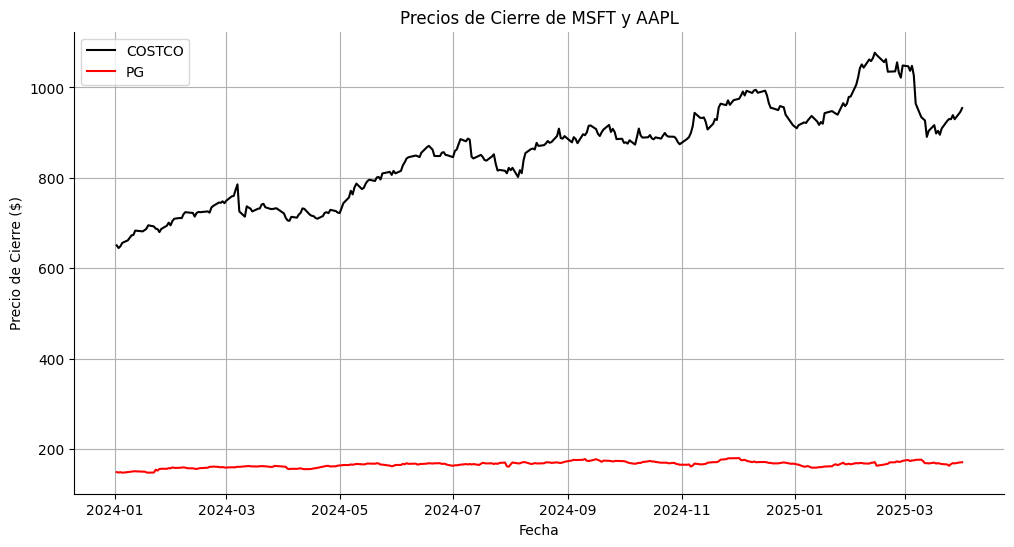

In [53]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['COST_Close'], label='COSTCO', color='black')
plt.plot(df['PG_Close'], label='PG', color='red')
plt.title('Precios de Cierre de MSFT y AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [54]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['COST_Close', 'PG_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1633  , p=0.6864  , df_denom=309, df_num=1
ssr based chi2 test:   chi2=0.1649  , p=0.6847  , df=1
likelihood ratio test: chi2=0.1649  , p=0.6847  , df=1
parameter F test:         F=0.1633  , p=0.6864  , df_denom=309, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1897  , p=0.8273  , df_denom=306, df_num=2
ssr based chi2 test:   chi2=0.3856  , p=0.8247  , df=2
likelihood ratio test: chi2=0.3853  , p=0.8248  , df=2
parameter F test:         F=0.1897  , p=0.8273  , df_denom=306, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4046  , p=0.7498  , df_denom=303, df_num=3
ssr based chi2 test:   chi2=1.2417  , p=0.7430  , df=3
likelihood ratio test: chi2=1.2392  , p=0.7436  , df=3
parameter F test:         F=0.4046  , p=0.7498  , df_denom=303, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5606  , p=0.6914  

In [55]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['PG_Close', 'COST_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4948  , p=0.0113  , df_denom=309, df_num=1
ssr based chi2 test:   chi2=6.5578  , p=0.0104  , df=1
likelihood ratio test: chi2=6.4898  , p=0.0108  , df=1
parameter F test:         F=6.4948  , p=0.0113  , df_denom=309, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2201  , p=0.0413  , df_denom=306, df_num=2
ssr based chi2 test:   chi2=6.5454  , p=0.0379  , df=2
likelihood ratio test: chi2=6.4774  , p=0.0392  , df=2
parameter F test:         F=3.2201  , p=0.0413  , df_denom=306, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0828  , p=0.1025  , df_denom=303, df_num=3
ssr based chi2 test:   chi2=6.3928  , p=0.0940  , df=3
likelihood ratio test: chi2=6.3278  , p=0.0967  , df=3
parameter F test:         F=2.0828  , p=0.1025  , df_denom=303, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.8552  , p=0.0239  

In [56]:
pip install prophet


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyjjim7nj/680s38j9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyjjim7nj/m6zgc0uv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72661', 'data', 'file=/tmp/tmpyjjim7nj/680s38j9.json', 'init=/tmp/tmpyjjim7nj/m6zgc0uv.json', 'output', 'file=/tmp/tmpyjjim7nj/prophet_modelzzw8631k/prophet_model-20250602205622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


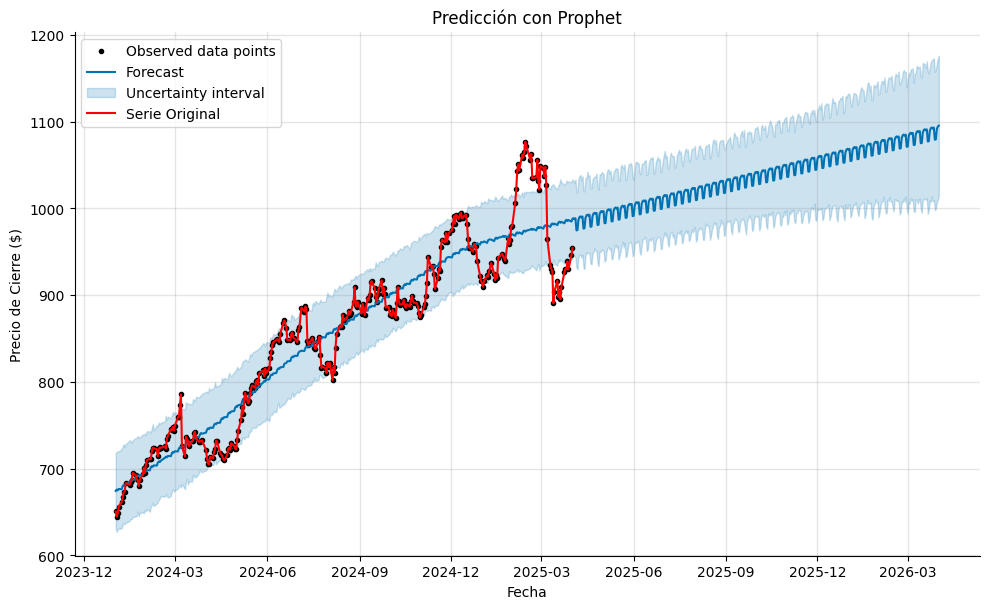

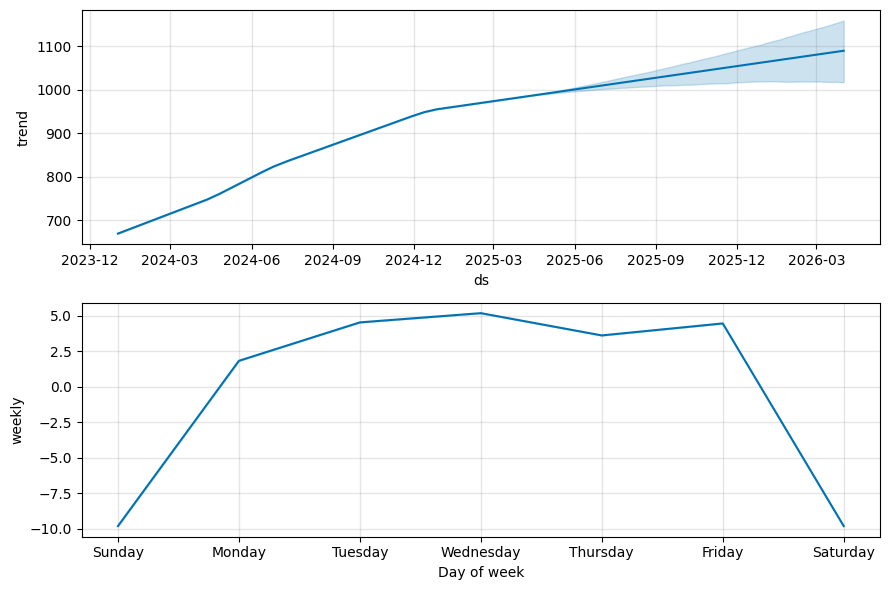

In [58]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['COST_Close'].reset_index().rename(columns={'date': 'ds', 'COST_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['COST_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyjjim7nj/yp8uxji3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyjjim7nj/dq13ztzj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24387', 'data', 'file=/tmp/tmpyjjim7nj/yp8uxji3.json', 'init=/tmp/tmpyjjim7nj/dq13ztzj.json', 'output', 'file=/tmp/tmpyjjim7nj/prophet_modelqux9xmch/prophet_model-20250602205645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


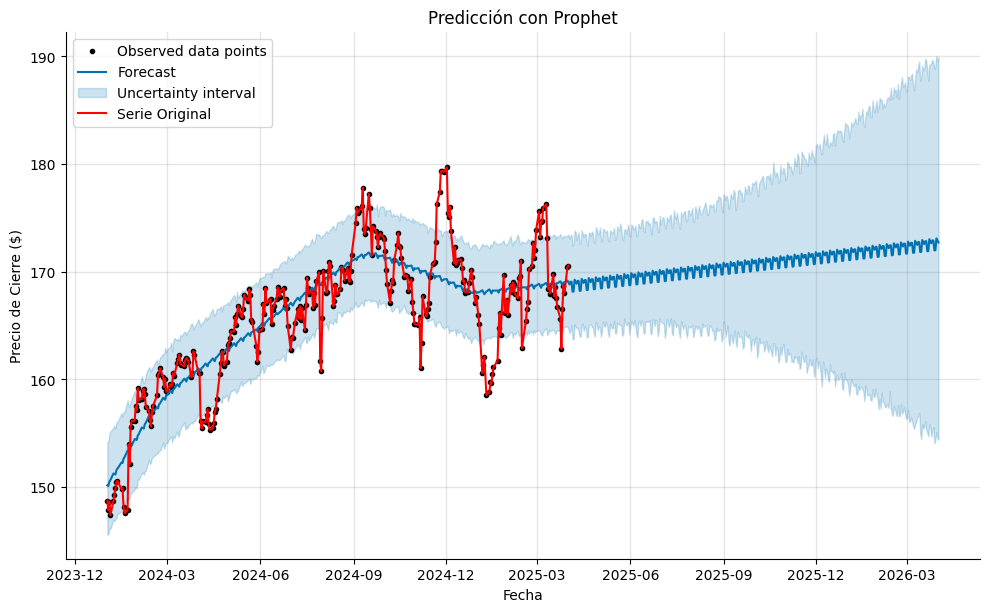

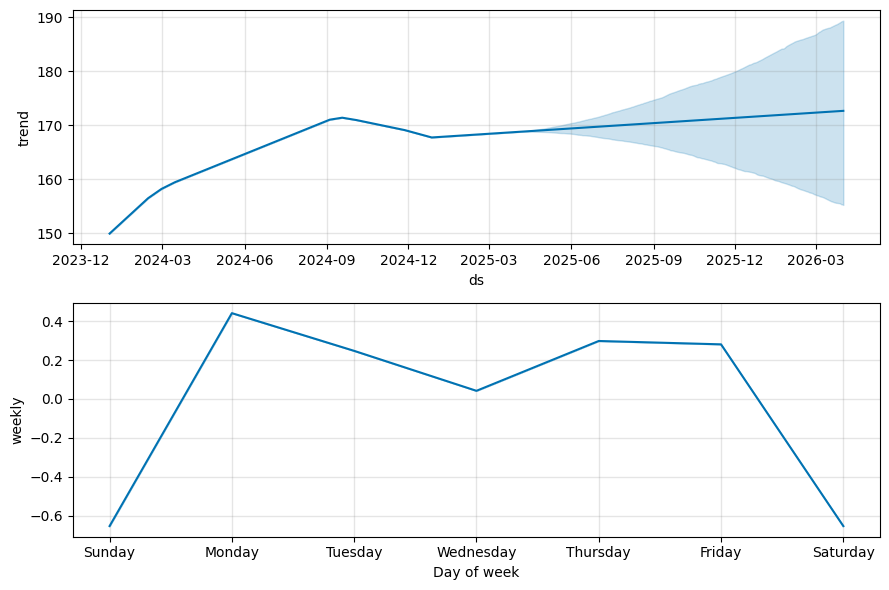

In [59]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['PG_Close'].reset_index().rename(columns={'date': 'ds', 'PG_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['PG_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

# RESULTADOS
La serie original de precios de cierre no es estacionaria, según ADF y KPSS.

Tras ajustar la tendencia polinómica y analizar los residuales:

Los residuales sí son estacionarios, lo que permite trabajar con modelos lineales sobre residuos.

Causalidad de Granger:

COST ⟶ PG: No se encontró evidencia significativa de causalidad en ninguno de los rezagos (p-valores > 0.68).

PG ⟶ COST: Se encontraron resultados significativos en los rezagos 1, 2, 4 y 5 (p-valores < 0.05), lo que sugiere que PG causa a COST en el sentido de Granger.

Predicciones con Prophet:

Se generaron predicciones de precios para 365 días posteriores. Las gráficas muestran proyecciones con tendencia general al alza en ambos casos, aunque el modelo desactiva automáticamente ciertas estacionalidades.



# Conclusiones
A lo largo del análisis se confirmó que los precios de cierre de las acciones de COSTCO y Procter & Gamble presentan características típicas de series financieras reales, como la no estacionariedad. No obstante, mediante ajustes de tendencias polinómicas y transformaciones, fue posible modelar de manera adecuada las trayectorias subyacentes de ambas series, facilitando el análisis estructural y predictivo posterior.

En cuanto a la prueba de causalidad de Granger, los resultados indican que no existe evidencia estadísticamente significativa de que los precios de COSTCO causen a los de PG. Sin embargo, en dirección contraria, sí se detectó una relación causal desde PG hacia COSTCO en varios rezagos, lo cual sugiere que los movimientos de Procter & Gamble podrían anticipar, en cierta medida, las variaciones de COSTCO, aunque este efecto debe interpretarse cuidadosamente.

El uso del modelo Prophet permitió generar proyecciones de precios a futuro de forma clara y visualmente interpretable, constituyendo una herramienta útil para complementar el análisis tradicional de series de tiempo.

En conjunto, este trabajo demuestra el valor de combinar herramientas estadísticas, gráficas y predictivas para comprender el comportamiento bursátil de empresas clave. Para futuras investigaciones, se recomienda incluir un mayor número de compañías, extender el rango temporal del análisis y explorar modelos más avanzados, como los basados en aprendizaje automático, para mejorar la capacidad predictiva y entender mejor las interrelaciones en los mercados financieros.